<a href="https://colab.research.google.com/github/Jaewon45/BDAnalysis/blob/main/4_1_wine_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 3-3. classification with DL
- example 1: wine
#### 1. import dataset

In [21]:
import tensorflow as tf; import matplotlib.pyplot as plt; import seaborn as sns
import pandas as pd; import numpy as np; import random
sns.set_theme(color_codes = True)
random.seed(22); np.random.seed(22); tf.random.set_seed(22)
red = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')
white = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=';')

#### 2. data preprocessing

In [22]:
red['type'] = 0; white['type'] = 1
wine = pd.concat([red, white]); wine_copied = wine.copy()
# 결측치, 범주형 변수 확인
# wine.info(); sns.pairplot(wine); plt.show()

In [23]:
# wine['quality'].value_counts() : 원핫인코딩 필요
wine = pd.get_dummies(data = wine, columns = ['quality', 'type'], prefix = ['quality', 'type'])
# plt.hist(wine_copied['type']); plt.xticks([0, 1]); plt.show()
# wine_copied['type'].value_counts() : 불균형데이터

In [24]:
# train/test split
X = wine.iloc[:, :-2]; y = wine.iloc[:,-2:]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    shuffle=True, random_state=22)
# feature scaling
from sklearn import preprocessing
# normalization
minmax_scaler = preprocessing.MinMaxScaler(); norm_fit = minmax_scaler.fit(X_train)
X_train_norm = norm_fit.transform(X_train); X_test_norm = norm_fit.transform(X_test)
# standardization
standard_scaler = preprocessing.StandardScaler(); stan_fit = standard_scaler.fit(X_train)
X_train_stan = stan_fit.transform(X_train); X_test_stan = stan_fit.transform(X_test)

#### 3. building model

In [25]:
from tensorflow.keras import Sequential; from tensorflow.keras.layers import Dense

model = tf.keras.Sequential([    
     # hidden layer
    tf.keras.layers.Dense(units=48, activation='relu', input_shape=(18,)),  
    tf.keras.layers.Dense(units=24, activation='relu'),
    tf.keras.layers.Dense(units=12, activation='relu'),
    # output layer
    tf.keras.layers.Dense(units=2, activation='softmax')])

# model compile
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.05), 
              loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 48)                912       
                                                                 
 dense_9 (Dense)             (None, 24)                1176      
                                                                 
 dense_10 (Dense)            (None, 12)                300       
                                                                 
 dense_11 (Dense)            (None, 2)                 26        
                                                                 
Total params: 2,414
Trainable params: 2,414
Non-trainable params: 0
_________________________________________________________________


#### 4. training model & Test model
- raw data

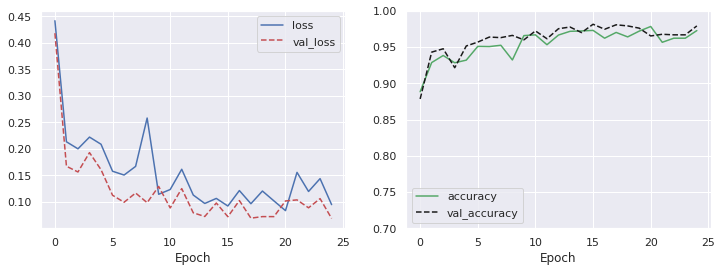

In [26]:
history = model.fit(X_train, y_train, epochs=25, batch_size=32, 
                    validation_split=0.25, verbose = 0)
# visualization loss and accuracy (loss, metrics 따로)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1); plt.plot(history.history['loss'],'b-',label='loss')
plt.plot(history.history['val_loss'],'r--',label='val_loss')
plt.xlabel('Epoch'); plt.legend()
plt.subplot(1, 2, 2); plt.plot(history.history['accuracy'],'g-',label='accuracy')
plt.plot(history.history['val_accuracy'],'k--',label='val_accuracy')
plt.xlabel('Epoch'); plt.ylim(0.7, 1); plt.legend() 
plt.show()
# epoch 증가시 loss는 감소, metrics는 증가

In [29]:
loss, accuracy = model.evaluate(X_test, y_test)
print(loss,accuracy)

41/41 [==============================] - 0s 3ms/step - loss: 0.0553 - accuracy: 0.9854
0.05533691495656967 0.9853846430778503


- MinMax normalization, standardization

In [32]:
history = model.fit(X_train_norm, y_train, epochs=25, batch_size=32,
                    validation_split=0.25, verbose = 0)
loss, accuracy = model.evaluate(X_test, y_test)
# 동일하게 시각화, loss/accuracy 출력 진행

41/41 [==============================] - 0s 2ms/step - loss: 95.5092 - accuracy: 0.7654


In [33]:
history = model.fit(X_train_stan, y_train, epochs=25, batch_size=32, 
                    validation_split=0.25, verbose = 0)
loss, accuracy = model.evaluate(X_test, y_test)
# 동일하게 시각화, loss/accuracy 출력 진행

41/41 [==============================] - 0s 2ms/step - loss: 0.8974 - accuracy: 0.7585


- confusion matrix

In [35]:
# white = 1, red = 0인 type_1 column 추출
y_test_c = y_test.iloc[:, 1]
# 0.9 이상인 확률은 1, 아닐 경우 0
predictions = model.predict(X_test_norm); y_pred = (predictions > 0.9)
# confusion matrix
from sklearn import metrics
matrix = metrics.confusion_matrix(y_pred.argmax(axis = 1), y_test_c)
import pandas as pd
pd.DataFrame(matrix, columns = ["white", "red"], index = ["white", "red"])

,white,red
white,79,0
red,235,986
